In [3]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torchshow as ts
import torchmetrics
import matplotlib.pyplot as plt

In [47]:
# Importere dataset, kun træning indtil videre.
training_images = MNIST(root='data', transform=ToTensor(), train=True)
training_dataloader = DataLoader(training_images, batch_size=1000)
testing_images = MNIST(root='data', transform=ToTensor(), train=False)
testing_dataloader = DataLoader(testing_images, batch_size=1000)

In [73]:
# Laver det Neurale Netværk, og opstiller et accuracy objekt til at måle hvor god modellen er.
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
net = nn.Sequential(
    nn.Conv2d(1, 10, kernel_size=3), #første parameter 1 er antal kanaler, her 1 fordi vi arbejder med gråtoner; 12 er antal ouputkanaler, altså antal filtre; 3 er størrelsen på det udsnit af billedet vi tager, som så bliver 3x3 matrice af pixels.
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2), #vælger den maksimale værdi i et udsnit af størrelsen 2x2, således dimensionerne af dataene reduceres fra 28x28 til 14x14
    nn.Conv2d(10, 10, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2), #vælger den maksimale værdi i et udsnit af størrelsen 2x2, således dimensionerne af dataene reduceres fra 14x14 til 7x7
    nn.Flatten(),
    nn.Linear(250,10), # input er nu 5 x 5 x 10
)
# Bruger crossentropy til at udregne losset, og indstiller optimizeren.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01, maximize=False)

In [74]:
# Loop'er over 10 epoker, og udregner loss'et og accuracy for hvert.
def training_loop(training_dataloader, optimizer, loss_fn):
    total_loss = 0
    accuracy.reset()
    size = len(training_dataloader)
    for images,labels in training_dataloader:
        optimizer.zero_grad()
        output = net(images)
        loss = loss_fn(output, labels)
        total_loss += loss
        loss.backward()
        optimizer.step()
        accuracy.update(output, labels)
    avg_loss = total_loss / size
    print(f"Avg Training Accuracy: {accuracy.compute() * 100:.2f}%")
    print(f"Avg Training Loss: {avg_loss}")

def testing_loop(testing_dataloader, loss_fn):
    total_loss = 0
    accuracy.reset()
    size = len(testing_dataloader)
    with torch.no_grad():
        for images,labels in testing_dataloader:
            output = net(images)
            loss = loss_fn(output, labels)
            total_loss += loss
            accuracy.update(output,labels)
    avg_loss = total_loss / size
    print(f"Avg Testing Accuracy: {accuracy.compute() * 100 :.2f}%")
    print(f"Avg Testing Loss: {avg_loss}")

In [ ]:
for i in range(10):
    print(f"Epoch: {i}")
    testing_loop(testing_dataloader, loss_fn)
    training_loop(training_dataloader, optimizer, loss_fn)
    print("------------------")

In [ ]:
# Afprøver modellen på et givent index af billederne.
img_idx = 10
pred = net(training_images[img_idx][0].unsqueeze(0)) 
print("Model output:")
print(pred)
sm = nn.Softmax(dim=1)
print("Efter softmax:")
print(sm(pred))
print(f"Modul bud: {pred.argmax()}")
print()
ts.show(training_images[img_idx][0])

In [1]:
import cv2

# Video setup
cap = cv2.VideoCapture(0)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
width = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

while True:

    _, frame = cap.read()
    frame_copy = frame.copy()

    bbox_size = (60, 60)

    cv2.imshow("input", frame_copy)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


2025-01-10 13:15:39.510 python[23077:696934] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


: 

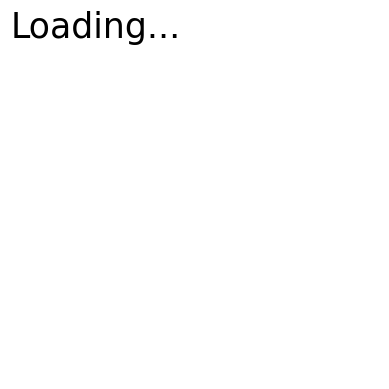

2025-01-10 13:25:01.180 python[23166:703402] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


11

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set up figure
fig = plt.figure(1)
ax = fig.gca()
vid = plt.imshow(np.ones((224, 224, 3)))
lbl = plt.text(0, 0, "Loading...", size=25, va='top')
lbl.set_bbox({'facecolor': 'white', 'alpha': 0.5, 'edgecolor': 'none'})
ax.set_axis_off()
plt.ion()
plt.show()

# Set up video capture
cap = cv2.VideoCapture(0)
fig.canvas.mpl_connect('close_event', lambda evt: cap.release())